# ================================================
# 1️⃣ Import Libraries
# ================================================

pip install tensorflow

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models


In [18]:
# ================================================
# 2️⃣ Load Dataset
# ================================================
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print("✅ Dataset Loaded Successfully!")
print(df.head())

✅ Dataset Loaded Successfully!
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimete


# ================================================
# 3️⃣ Basic EDA
# ================================================

In [19]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness 

In [20]:
print("\nClass Distribution:")
print(df['target'].value_counts())



Class Distribution:
target
1    357
0    212
Name: count, dtype: int64


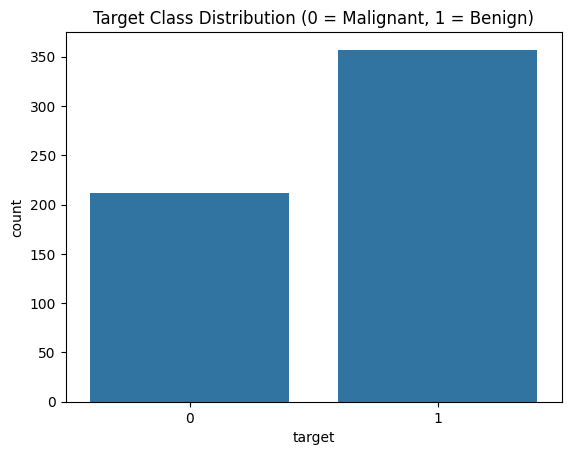

In [21]:
# Visualize class balance
sns.countplot(x='target', data=df)
plt.title("Target Class Distribution (0 = Malignant, 1 = Benign)")
plt.show()


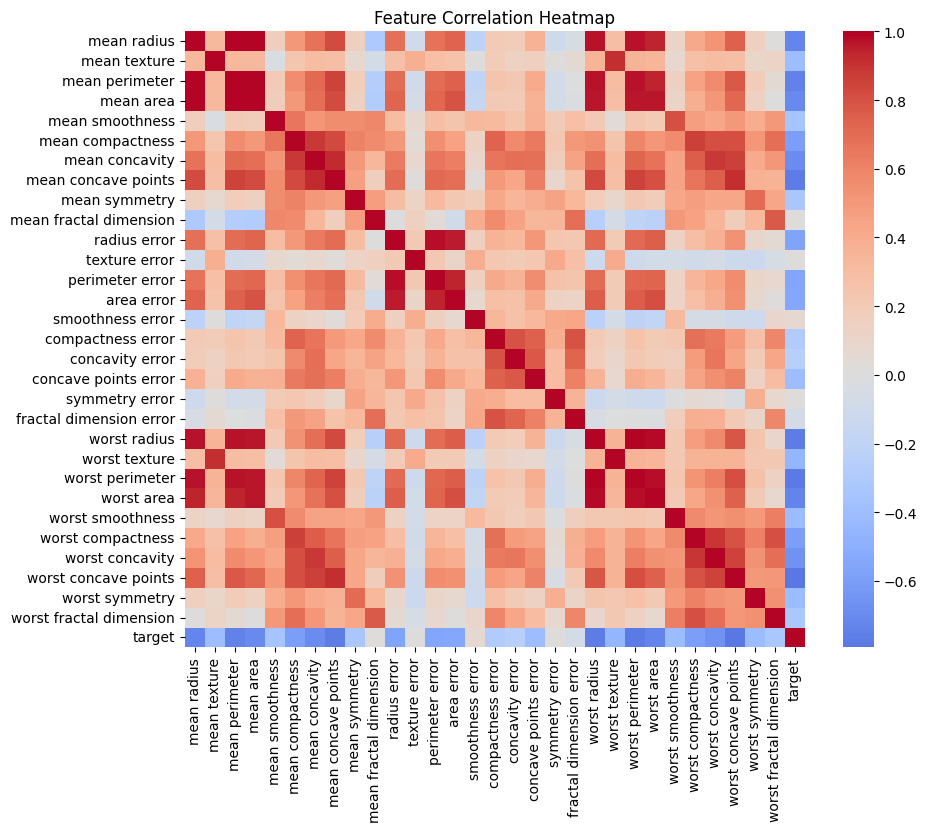

In [22]:
# Correlation heatmap (top features)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

In [23]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum().sum())


Missing Values:
0


# ================================================
# 4️⃣ Preprocessing
# ================================================

In [24]:
X = df.drop('target', axis=1)
y = df['target']

In [25]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✅ Data Preprocessing Completed!")


✅ Data Preprocessing Completed!


# ================================================
# 5️⃣ Build TensorFlow Model
# ================================================

In [27]:
model = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # sigmoid → binary output between 0 and 1
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,537 (6.00 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

# ================================================
# 6️⃣ Train Model
# ================================================

In [28]:
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6045 - loss: 0.6410 - val_accuracy: 0.8571 - val_loss: 0.4860
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9425 - loss: 0.3969 - val_accuracy: 0.9341 - val_loss: 0.3039
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9420 - loss: 0.2485 - val_accuracy: 0.9451 - val_loss: 0.2079
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9486 - loss: 0.1675 - val_accuracy: 0.9560 - val_loss: 0.1608
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9450 - loss: 0.1419 - val_accuracy: 0.9560 - val_loss: 0.1361
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9692 - loss: 0.1011 - val_accuracy: 0.9560 - val_loss: 0.1205
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9883 - loss: 0.0831 - val_accuracy: 0.9670 - val_loss: 0.1116
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9912 - loss: 0.0651 - val_accuracy: 0.9780 - va

# ================================================
# 7️⃣ Evaluate Model
# ================================================

In [29]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"\n✅ Test Accuracy: {accuracy*100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9707 - loss: 0.0972 

✅ Test Accuracy: 97.37%


# ================================================
# 8️⃣ Plot Training Results
# ================================================

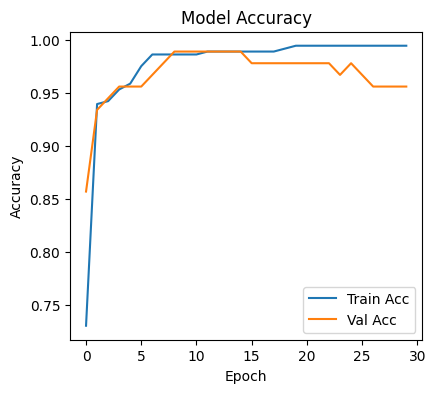

In [30]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

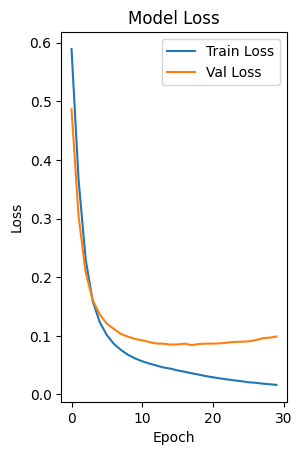

In [31]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
new_sample = X_test.iloc[0]                   # take one sample from test set
new_sample_scaled = scaler.transform([new_sample])  # scale it same as training data

# Predict
prediction_prob = model.predict(new_sample_scaled)[0][0]
prediction_class = int(prediction_prob > 0.5)

print("\n🧩 Single Sample Prediction:")
print(f"Predicted Class: {prediction_class} (0 = Malignant, 1 = Benign)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step

🧩 Single Sample Prediction:
Predicted Probability of Benign (class 1): 0.9645
Predicted Class: 1 (0 = Malignant, 1 = Benign)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
